** Extreme Optimization 2 ** 

In [2]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from pprint import pprint

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

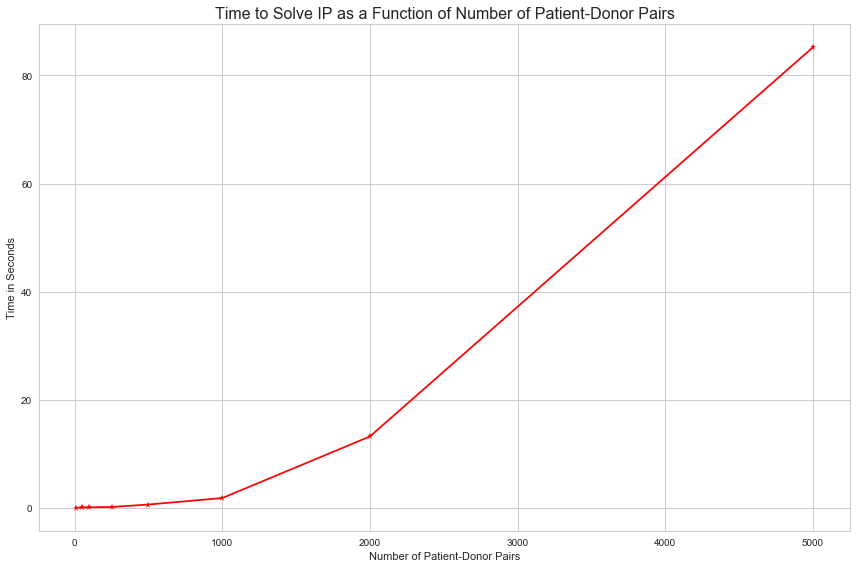

In [6]:
size = [10, 50,  100, 250, 500, 1000, 2000, 5000]
time = [ 0.011522, 0.064555, 0.096478, 0.155825, 0.614688, 1.81577, 13.2094,  85.1876]

fig, ax = plt.subplots(1,1,figsize=(12,8))

ax.plot(size, time, 'r*-', label="Time to Solve IP")
ax.set_title("Time to Solve IP as a Function of Number of Patient-Donor Pairs", fontsize=16)
plt.ylabel("Time in Seconds")
plt.xlabel("Number of Patient-Donor Pairs")

plt.tight_layout();


In [7]:
ip_time = pd.DataFrame(time, size)
columns = ["Time to Solve, seconds" for i in range(ip_time.shape[1])] 
ip_time.columns = columns
ip_time.index= [str(i) + " pairs" for i in size]
ip_time

,"Time to Solve, seconds"
10 pairs,0.011522
50 pairs,0.064555
100 pairs,0.096478
250 pairs,0.155825
500 pairs,0.614688
1000 pairs,1.815770
2000 pairs,13.209400
5000 pairs,85.187600


In [64]:
number_pairs = [10, 50, 100, 250, 500, 1000, 2000]

users_matched  = [2, 28, 56, 160, 316,612, 1192]

time = [ 0.015854, 0.039621, 0.052141, 0.162553, 0.94178, 4.93382,26.8951]

mip_simplex_iteration = [0, 23, 23, 266, 575,1526, 5884]

branch_bound_nodes = [0,0, 0, 0, 0, 0,0 ]


In [65]:
ip_time = pd.DataFrame(time, number_pairs)
columns = ["Time to Solve, seconds" for i in range(ip_time.shape[1])] 
ip_time.columns = columns
ip_time.index= [str(i) + " pairs" for i in number_pairs]
ip_time

ip_time['Pairs Matched'] = users_matched

percentage_matched = [(users_matched[i]/number_pairs[i])*100 for i in range(len(users_matched))]
ip_time['Pairs Matched, as % of Total Pairs'] = percentage_matched

ip_time['MIP Simplex Iterations'] = mip_simplex_iteration

In [66]:
ip_time

,"Time to Solve, seconds",Pairs Matched,"Pairs Matched, as % of Total Pairs",MIP Simplex Iterations
10 pairs,0.015854,2,20.0,0
50 pairs,0.039621,28,56.0,23
100 pairs,0.052141,56,56.0,23
250 pairs,0.162553,160,64.0,266
500 pairs,0.941780,316,63.2,575
1000 pairs,4.933820,612,61.2,1526
2000 pairs,26.895100,1192,59.6,5884


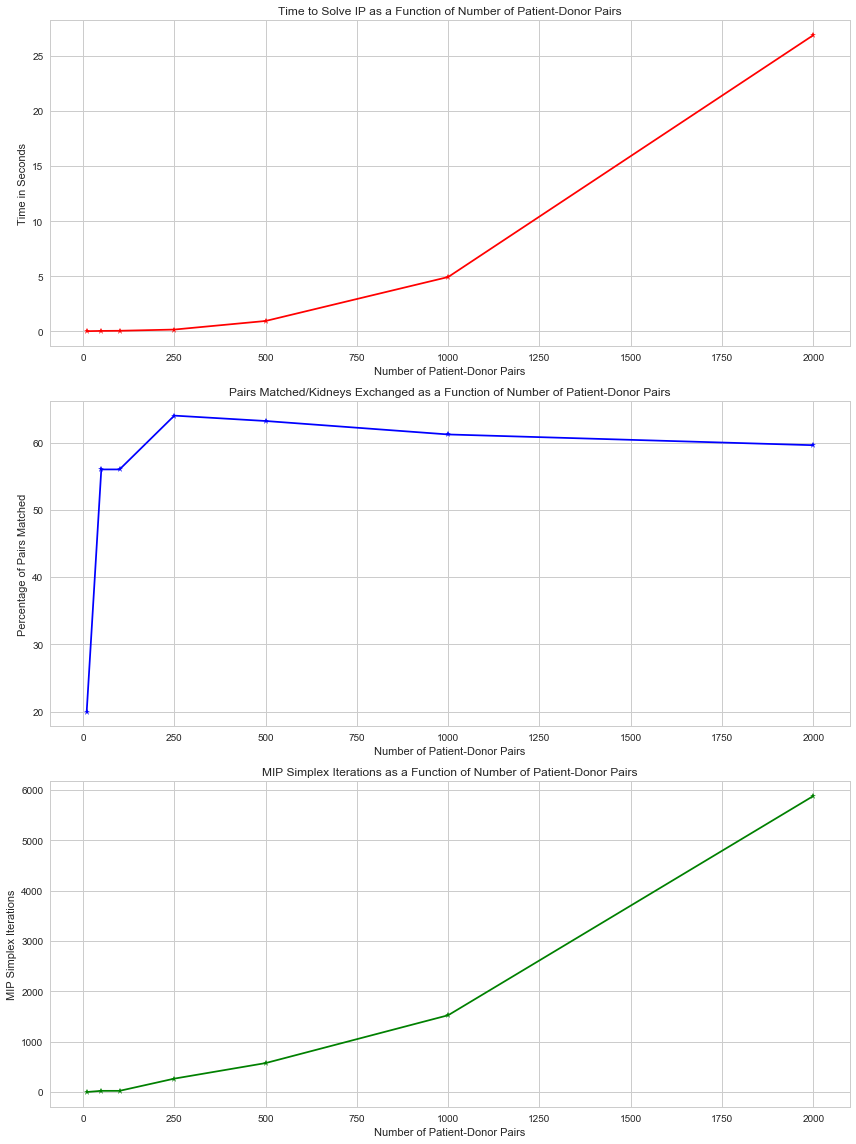

In [67]:
fig, axs = plt.subplots(3,1,figsize=(12,16))

axs[0].plot(number_pairs, time, 'r*-', label="Time to Solve IP")
axs[0].set(title="Time to Solve IP as a Function of Number of Patient-Donor Pairs", ylabel="Time in Seconds", xlabel = "Number of Patient-Donor Pairs" )
fig.savefig("eo2_task1_timepairs.png")

axs[1].plot(number_pairs, percentage_matched, 'b*-', label="Pairs Matched")
axs[1].set(title="Pairs Matched/Kidneys Exchanged as a Function of Number of Patient-Donor Pairs",ylabel="Percentage of Pairs Matched", xlabel = "Number of Patient-Donor Pairs")
fig.savefig("eo2_task1_kidneyspairs.png")

axs[2].plot(number_pairs, mip_simplex_iteration, 'g*-', label="MIP Simplex Iterations")
axs[2].set(title="MIP Simplex Iterations as a Function of Number of Patient-Donor Pairs", ylabel="MIP Simplex Iterations", xlabel = "Number of Patient-Donor Pairs")
fig.savefig("eo2_task1_simplexiterpairs.png")

plt.tight_layout();